# Exemplos de Modelagem Computacional

Renato Naville Watanabe

### Motivação

A Modelagem e Simulação Computacional está cada vez mais presente em diversas áreas.
Permitem estudar sistemas reais de maneira aproximada, através modelos matemáticos que os representam.

Tais modelos são implementados em simulações computacionais, que são executadas visando obter um melhor entendimento do sistema real.

Desta forma, a Modelagem e Simulação Computacional configuram-se como uma poderosa ferramenta para:

- Observar comportamentos;
- Testar teorias e hipóteses;
- Predizer comportamentos e ações futuras;

### Sistema

Um sistema é uma combinação de componentes agindo em conjunto para realizar um objetivo específico.

Não é limitado aos fenômenos físicos. O conceito de um sistema pode ser estendido a fenômenos abstratos, tais como aqueles encontrados em economia, transporte, crescimento populacional e biologia.

### Formas de se estudar um sistema

Há algumas formas de se estudar um sistema:
    
- Experimentos com o Sistema Real.
- Experimentos com Modelos Físicos.
- Experimentos com Modelos Matemáticos.

### Experimentos com o Sistema Real

Podem ser empregados quando é possível trabalhar diretamente com o sistema real, atuando em seus elementos e/ou alterando sua configuração.

Como exemplo tem-se um experimento real de teste de impacto (ou crash-test).
<table><tr>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/crash2.jpg?raw=1" width="400" /></td>
</tr></table>


Tratar diretamente com o sistema real pode não ser possível:
O experimento pode ser muito caro ou perigoso. Por exemplo, analisar pessoas em uma situação de incêndio.

<table><tr>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/fogo.png?raw=1" width="400" /></td>
</tr></table>


Pode ser impossível tratar diretamente com sistemas reais.

Exemplo: a análise dos buracos negros, ou situações onde não há evidências da existência do sistema.

<table><tr>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/black_hole.jpg?raw=1" width="400" /></td>
</tr></table>


Em muitas situações é necessário construir um modelo que represente parcialmente o sistema e realizar experimento com este modelo.

Desta forma, é possível estudar o sistema real de maneira indireta, deixando-o inalterado.

Um **modelo** é uma representação parcial de um objeto, sistema ou ideia.

### Modelos físicos

Os modelos físicos consideram: experimentos com objetos reais
tais objetos atuam como representações parciais do sistema que se
deseja estudar

Como exemplo: mapas, maquetes e modelos animais.
    
<table><tr>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/model.jpg?raw=1" width="300" /></td>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/plane_model.jpg?raw=1" width="300" /></td>
<td>    <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/animal.jpg?raw=1" width="300" /></td>
</tr></table>

### Modelo matemático

Modelos matemáticos usam símbolos em lugar de dispositivos físicos, procurando representar  as principais características e comportamentos do sistema alvo que se deseja analisar.

Há duas formas de solução de modelos matemáticos:

- Solução analítica;
- **Solução numérica (via simulação computacional).**

### Exemplo: Monte Carlo

Iremos ilustrar simulação computacional com o "Método de Monte Carlo" para estimar o
valor de $\pi$.

O Método de Monte Carlo foi primeiro usado por Metropolis, Von Neumann, e Ulam em 1940,
durante o projeto Manhattan (bomba atômica).

Consiste na geração de números aleatórios para calcular propriedades de interesse.

#### Geração de números aleatórios

A geração de números aleatórios em um computador se baseia em geradores de números pseudo-aleatórios. Esses geradores não geram números realmente aleatórios, mas geram números que tem propriedades que se aproximam muito de números realmente aleatórios (vindos de uma roleta, por exemplo). Para mais informações de como esses geradores de números pseudo-aleatórios, veja, por exemplo [o apêndice B do livro de Morettin e Singer (2021)](https://www.ime.usp.br/~pam/cdadosf3.pdf). A biblioteca Numpy tem geradores de números pseudo-aleatórios já implementados. Para utilizar esses geradores, deve-se usar a seguinte linha.

In [1]:
import numpy as np
rng = np.random.default_rng()

A variavel `rng` é um conjunto de geradores de números pseudo-aleatórios. Aqui, iremos utilizar um gerador com distribuição uniforme dos números gerados. Esse gerador produz números entre 0 e 1 com igual probabilidade para qualquer número nesse intervalo. Por exemplo, para gerar 10 números com essa distribuição, executar a linha abaixo (cada vez que a linha for executada, serão gherados números diferentes):

In [3]:
x = rng.uniform(size=10)
x

array([0.21076654, 0.35782479, 0.32931675, 0.60052511, 0.3022012 ,
       0.56498488, 0.11479967, 0.81243315, 0.43243288, 0.64427921])

Para ver que os números gerados têm de fato uma distriubuição uniforme, pdemos utilizar um histograma. Abaixo um histograma com 10000 números gerados:

(array([1042.,  967.,  986.,  962., 1005., 1047.,  991., 1024.,  988.,
         988.]),
 array([6.87709753e-05, 1.00054572e-01, 2.00040374e-01, 3.00026175e-01,
        4.00011976e-01, 4.99997777e-01, 5.99983579e-01, 6.99969380e-01,
        7.99955181e-01, 8.99940982e-01, 9.99926784e-01]),
 <BarContainer object of 10 artists>)

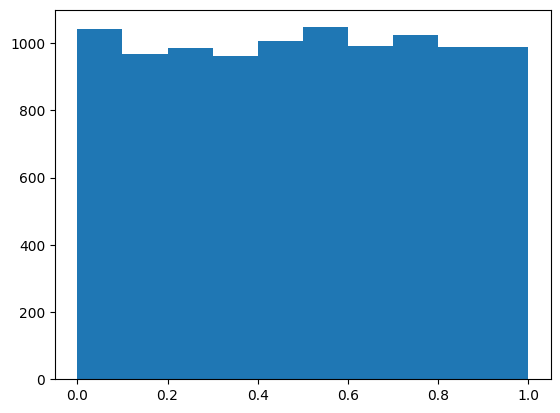

In [7]:
import matplotlib.pyplot as plt
x = rng.uniform(size=10000)
plt.hist(x)

Note que todas as barras do histograma têm aproximadamente os mesmos valores, conforme esperado na distribuição uniforme.

#### Estimativa do valor de $\pi$

Considere um quadrado com um circulo circunscrito:

![circ](https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/circulo.png?raw=1)

Sabe-se que:

- **Área do quadrado**:
$$A_Q = l^2 = (2r)^2 = 4r^2$$

- **Área do círculo**:

$$A_C = \pi r^2$$

Desta forma, temos:

$$\frac{A_C}{A_Q} = \frac{\pi r^2}{4r^2} \rightarrow \pi = 4\frac{A_C}{A_Q} $$

O método de Monte Carlo é utilizado para estimar a relação entre as áreas da circunferência e do quadrado. Ou seja, para estimar:

$$\frac{A_C}{A_Q}$$

Para tornar os cálculos mais simples, assume-se que o quadrado tenha um lado de tamanho $l = 1$. Assim, o raio da circunferência é $r = \frac{1}{2}$.

Utilizando um computador sorteamos aleatoriamente alguns pares de números aleatórios no intervalo [0, 1].

Cada par de números representará as coordenadas x e y de um ponto que pertence à área do quadrado.



Podemos estimar a proporção entre as áreas do círculo e do quadrado contando quantos pontos caem sobre cada uma das figuras.

$$\frac{A_C}{A_Q} \approx \frac{\text{número de pontos dentro do círculo}}{\text{total de pontos}}$$


<table><tr>
<td>   <img src="https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/circ3.png?raw=1" width="400" /></td>
</tr></table>



Dadas as coordenadas $(x, y)$ de um ponto A qualquer, oriundas de um sorteio aleatório, podemos saber se o ponto está dentro ou fora do círculo, calculando a distância Euclideana entre A e o centro do círculo C (com coordenadas $x_C = 0.5$ e $y_C = 0.5$).

![dist](https://github.com/BMClab/BasesComputacionais/blob/master/aula11/figuras/circ4.png?raw=1)

$$d = \sqrt{\Delta x^2 + \Delta y^2} = \sqrt{(x_C-x_A)^2 + (y_C-y_A)^2}$$



Se a distância $d$ for menor ou igual a $r$, o ponto está dentro do círculo.

### Referências

- Chalco, JM, *Slides de Bases Computacionais da Ciência*, (2014)
- Leite, S, *Slides de Bases Computacionais da Ciência*, (2018)
- [Marietto, MGB et al.; **Bases computacionais da Ciência** (2013)](http://prograd.ufabc.edu.br/images/pdf/bases_computacionais_livro.pdf).
- Ogata, K; *Dynamical systems* (2014)
- Morettin e Singer, Estatística Básica (2023)

## Apêndice

###  Código para produção do gráfico de pontos do círculo

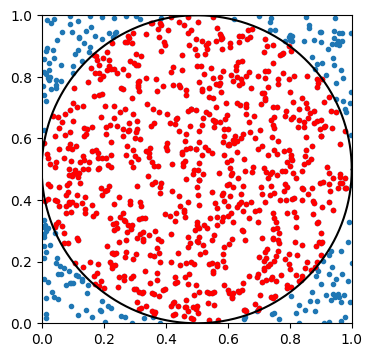

In [11]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
N = 1000
x = rng.uniform(size=N)
y = rng.uniform(size=N)
d = np.sqrt((x-0.5)**2+(y-0.5)**2)
plt.figure(figsize=(4,4))
plt.plot(x, y, '.')
plt.plot(x[d<0.5], y[d<0.5], color='red',
         marker='.',
         linestyle='')
theta = np.arange(0, 2*np.pi, 0.01)
r = 0.5
xcirc = r*np.cos(theta)+0.5
ycirc = r*np.sin(theta)+0.5
plt.plot(xcirc, ycirc, color='black',
         linestyle='-')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()